# Simulace polohy kyvadla a vykreslení histogramu

# Odvození rovnice

Rovnice je odvozena z 2. Newtonova zákona ($F=ma$) analýzou sil v tečném směru dráhy.

### 1. Tečná síla ($F_t$)

Tečná složka tíhové síly, která způsobuje pohyb:
$$F_t = -mg \sin(\alpha)$$

### 2. Tečné zrychlení ($a_t$)

Tečné zrychlení pro pohyb po kružnici o poloměru $\ell$:
$$a_t = \ell \frac{d^2\alpha}{dt^2}$$

### 3. Rovnice pohybu ($F_t = m \cdot a_t$)

$$-mg \sin(\alpha) = m \cdot \ell \frac{d^2\alpha}{dt^2}$$

Vydělením $m$ a převedením na standardní tvar získáme **nelineární diferenciální rovnici**:

$$\mathbf{\frac{d^2\alpha}{dt^2} + \frac{g}{\ell} \sin(\alpha) = 0}$$

Toto můžeme simulovat pomocí **numerického výpočtu derivace**:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def kyvadlo_simulace_numericka_derivace(x0_init, l, g, dt, n):
    alpha0 = np.arcsin(x0_init / l)
    
    alpha = np.zeros(n)
    omega = np.zeros(n)
    alpha[0] = alpha0
    omega[0] = 0.0 # počáteční úhlová rychlost
    
    #NUMERICKÁ SIMULACE
    for i in range(1, n):
        a_i = - (g / l) * np.sin(alpha[i-1])

        # Krok A: Výpočet rychlosti na základě staré polohy
        omega[i] = omega[i-1] + a_i * dt
        
        # Krok B: Výpočet nové polohy na základě nové rychlosti
        alpha[i] = alpha[i-1] + omega[i] * dt
        
    #PŘEVOD
    x = l * np.sin(alpha)
    return x

Z logiky věci by mělo vyjít, že nejčastěji se bude kyvadlo vyskytovat **v krajních oblastech**, jelikož tam je jeho rychlost nulová a tudíž tam stráví nejvíce času. Naopak **uprostřed** bude histogram nejnižší, jelikož tam je rychlost kyvadla nejvyšší a stráví tam nejméně času. 

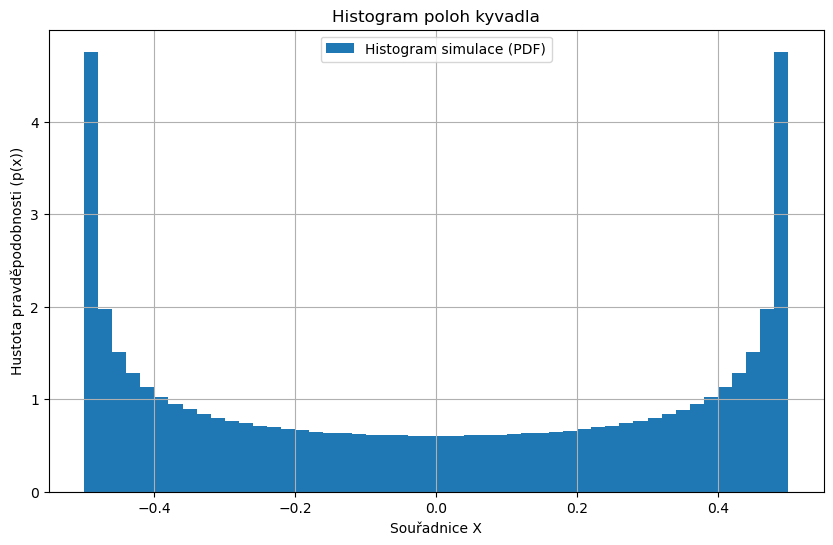

In [7]:
# Parametry
l = 1.0 # délka kyvadla
g = 9.81 # tíhové zrychlení
x0 = 0.5 # počáteční poloha
dt = 0.001 # časový krok
T_simulace = 1000 # Celkový čas simulace (v sekundách)
n = int(T_simulace / dt) # Počet kroků

# Spuštění simulace
x_sim = kyvadlo_simulace_numericka_derivace(x0, l, g, dt, n)

# Vytvoření histogramu
plt.figure(figsize=(10, 6))
plt.hist(x_sim, bins=50, density=True, label='Histogram simulace (PDF)') 


plt.xlabel('Souřadnice X')
plt.ylabel('Hustota pravděpodobnosti (p(x))')
plt.title('Histogram poloh kyvadla')
plt.legend()
plt.grid(True)
plt.show()

# Metoda inverzní funkce

In [8]:
r = np.random.random(1000000)
x_2 = x0*np.sin(np.pi*(r - 0.5))

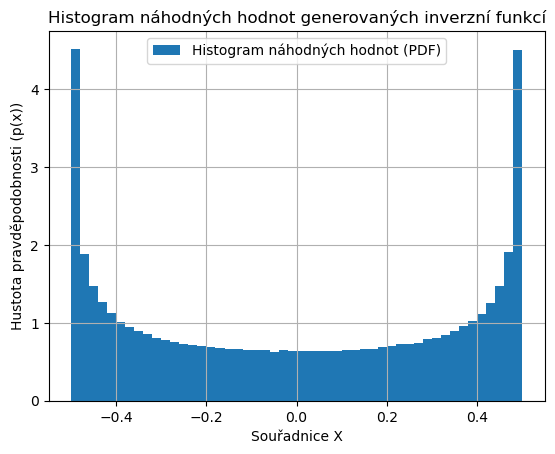

In [10]:
plt.hist(x_2, bins=50, density=True, label='Histogram náhodných hodnot (PDF)')
plt.xlabel('Souřadnice X')
plt.ylabel('Hustota pravděpodobnosti (p(x))')
plt.title('Histogram náhodných hodnot generovaných inverzní funkcí')
plt.legend()
plt.grid(True)
plt.show()